In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import random

from pso_thesis import *
from firefly_thesis import *

In [ ]:
pip install sklearn-nature-inspired-algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.9/181.9 kB 12.5 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("/content/breast-cancer.data")

In [ ]:
data.head()


,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
data.tail()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
284,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no-recurrence-events  285 non-null    object
 1   30-39                 285 non-null    object
 2   premeno               285 non-null    object
 3   30-34                 285 non-null    object
 4   0-2                   285 non-null    object
 5   no                    285 non-null    object
 6   3                     285 non-null    int64 
 7   left                  285 non-null    object
 8   left_low              285 non-null    object
 9   no.1                  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [ ]:
data.describe()

,3
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
data.count()

no-recurrence-events    285
30-39                   285
premeno                 285
30-34                   285
0-2                     285
no                      285
3                       285
left                    285
left_low                285
no.1                    285
dtype: int64

In [ ]:
data.columns = ["class", "age", "menopause","tumor-size", "inv-nodes",
                "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"  ]

In [ ]:
data.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [ ]:
data.value_counts

<bound method DataFrame.value_counts of                     class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  40-49   premeno      20-24       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  60-69      ge40      15-19       0-2        no   
3    no-recurrence-events  40-49   premeno        0-4       0-2        no   
4    no-recurrence-events  60-69      ge40      15-19       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
280     recurrence-events  30-39   premeno      30-34       0-2        no   
281     recurrence-events  30-39   premeno      20-24       0-2        no   
282     recurrence-events  60-69      ge40      20-24       0-2        no   
283     recurrence-events  40-49      ge40      30-34       3-5        no   
284     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad i

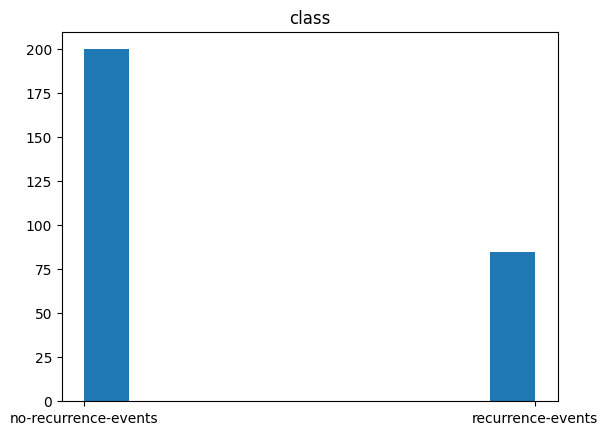

In [ ]:
plt.hist(data['class'])
plt.title('class')
plt.show()

In [ ]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
data['node-caps'].value_counts()

no     221
yes     56
?        8
Name: node-caps, dtype: int64

In [ ]:
data["node-caps"] = data['node-caps'].replace(to_replace='?', value='no')

In [ ]:
data['breast-quad'].value_counts()

left_low     109
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [ ]:
data["breast-quad"] = data['breast-quad'].replace(to_replace='?', value='left_low')

In [ ]:
data.drop_duplicates(subset=None, keep="first", inplace=False)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
class_map={"no-recurrence-events": 1, "recurrence-events":0}

data['class']=data['class'].map(class_map)

In [ ]:
age_map={"10-19":1, "20-29": 2, "30-39": 3,
        "40-49": 4, "50-59": 5,"60-69": 6,
        "70-79": 7, "80-89": 8,"90-99": 9 }
data['age']= data['age'].map(age_map)

In [ ]:
menop_map={"premeno": 1, "ge40": 2, "lt40": 3}
data['menopause']=data['menopause'].map(menop_map)

In [ ]:
tumor_map={"0-4":1, "5-9":2,"10-14":3, "15-19":4,"20-24":5, "25-29":6,
           "30-34":7, "35-39":8,"40-44":9, 
           "45-49":10,"50-54":11, "55-59":12}
data['tumor-size']= data['tumor-size'].map(tumor_map)

In [ ]:
inv_map={"0-2":1, "3-5":2,"6-8":3, "9-11":4,
         "12-14":5, "15-17":6,"18-20":7, 
         "21-23":8,"24-26":9, "27-29":10,
         "30-32":11, "33-35":12, "36-39":13}
data['inv-nodes']= data['inv-nodes'].map(inv_map)

In [ ]:
node_map={"yes": 1, "no": 0}
data['node-caps']=data['node-caps'].map(node_map)

In [ ]:
breast_map={"left": 0, "right": 1}
data['breast']=data['breast'].map(breast_map)

In [ ]:
quad_map={"left_up": 0, "left_low": 1, "right_up": 2,
          "right_low": 3, "central": 4}
data['breast-quad']=data['breast-quad'].map(quad_map)

In [ ]:
irr_map={"yes": 1, "no": 0}
data['irradiat']=data['irradiat'].map(irr_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = data.apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,0,4,0,0,1,1,2,0
1,1,2,0,4,0,0,1,0,1,0
2,1,4,1,3,0,0,1,1,0,0
3,1,2,0,0,0,0,1,1,3,0
4,1,4,1,3,0,0,1,0,1,0


class
0    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
1    [[Axes(0.125,0.722857;0.215278x0.157143), Axes...
dtype: object

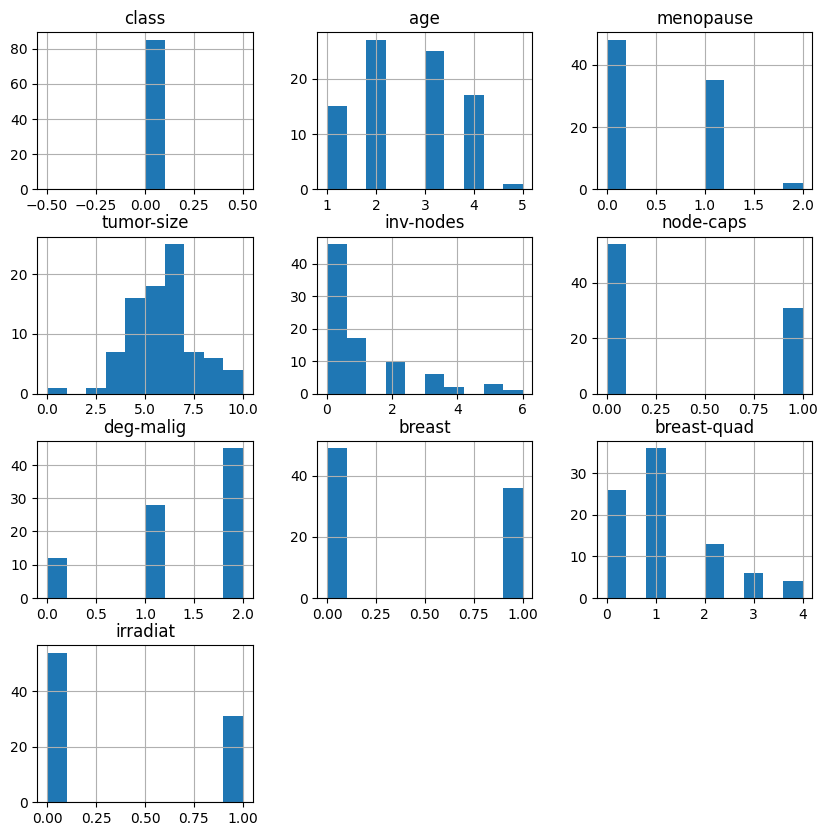

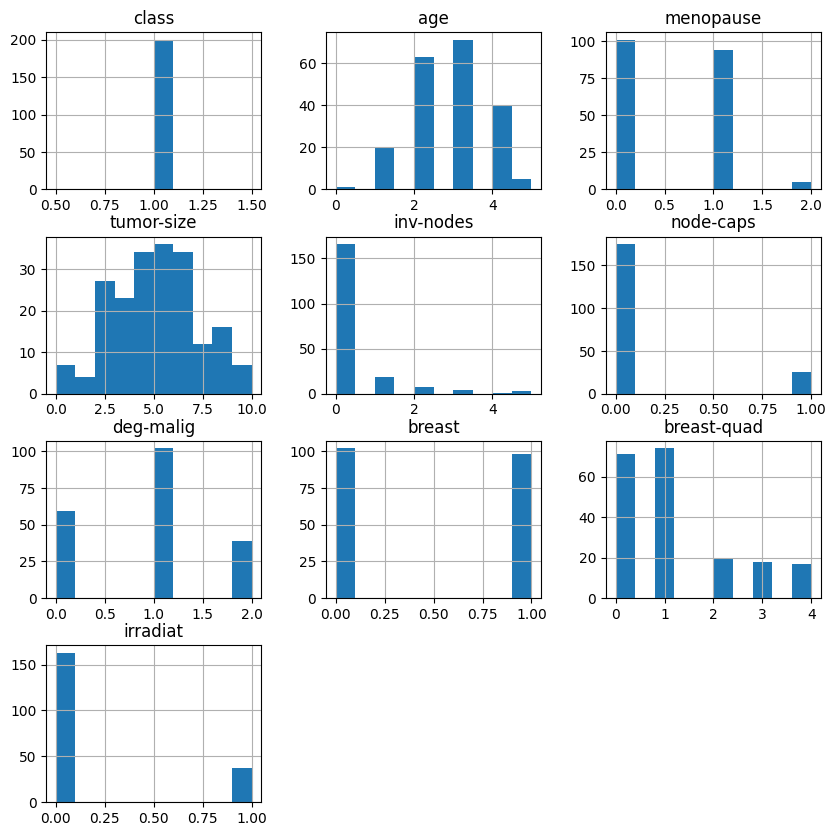

In [ ]:
data.groupby('class').hist(figsize=(10, 10))

In [ ]:
data.shape

(285, 10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop('class', axis=1)
y= data['class']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(random_state=42)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
X_train_os,Y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(Y_train_os)))

The number of classes before fit Counter({1: 158, 0: 70})
The number of classes after fit Counter({1: 158, 0: 158})


In [ ]:
class_counts = Counter(np.squeeze(y))

In [ ]:
class_counts

Counter({1: 200, 0: 85})

In [ ]:
import xgboost as xgb
model1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1.fit(X_train_os, Y_train_os)
model1.score(X_test,Y_test)

0.631578947368421

<Axes: >

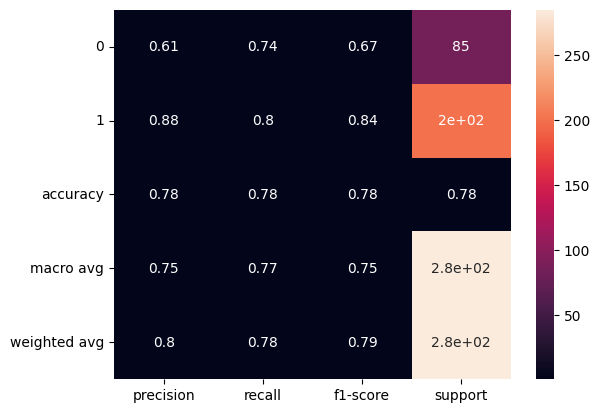

In [ ]:
y_pred_base = model1.predict(X)
report = classification_report(y, y_pred_base, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator = model1, X = X_train_os, y = Y_train_os, cv = 10)

In [ ]:
accuracies.mean()

0.7122983870967742

In [ ]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

In [ ]:
params_XG = {
    'n_estimators': (10, 100),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1),
    'colsample_bytree': (0.1, 1),
    'gamma': (0, 10)
}

In [ ]:
nia_search = NatureInspiredSearchCV(
    model1,
    params_XG,
    cv=5,
    verbose=1,
    algorithm='hba',
    population_size=10,
    max_n_gen=20,
    max_stagnating_gen=100,    
    runs=5,
    scoring='f1_macro',
    random_state=42,
)

nia_search.fit(X_train_os, Y_train_os)

Fitting 5 folds for some of the 128 candidates, which might total in 640 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candida

NatureInspiredSearchCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_...
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=1, ...),
                       max_n_gen=20, max_stagnating_gen=100,
                       param_grid={'colsample_bytree': (0.1, 1),
                                   'gamma': (0, 10), 'learning_rate': (0.01, 1),
                                   'max_depth': (3, 10),
                                   'min_child_weight': (1, 10),
                                   'n_estimators': (10, 100),
                                   'subsample': (0.1, 1)},
                       population_size=10, random_state=42, runs=5,
                       scoring='f1_macro', verbose=1)

In [ ]:
C = nia_search.best_params_

In [ ]:
from sklearn.metrics import classification_report
model1=xgb.XGBClassifier(random_state=42,**C)

model1.fit(X_train_os, Y_train_os)

y_pred = model1.predict(X_test)

print(classification_report(Y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.3333    0.5333    0.4103        15
           1     0.7879    0.6190    0.6933        42

    accuracy                         0.5965        57
   macro avg     0.5606    0.5762    0.5518        57
weighted avg     0.6683    0.5965    0.6188        57



<Axes: xlabel='generation', ylabel='score'>

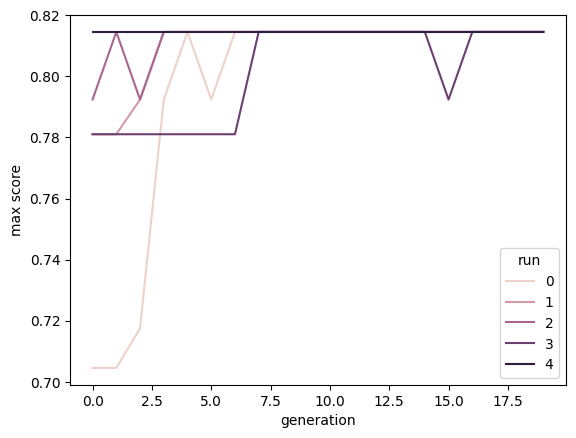

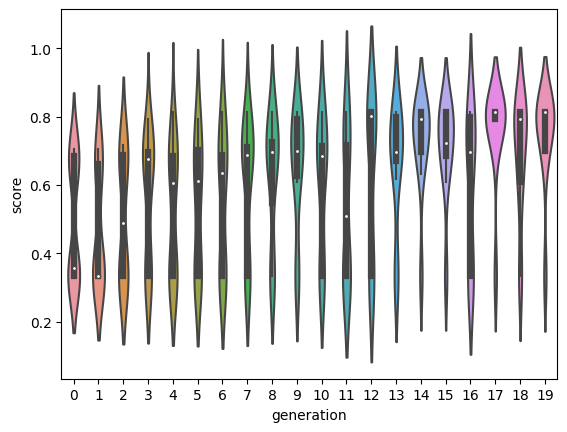

In [ ]:
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_violinplot

score_by_generation_lineplot(nia_search)
score_by_generation_violinplot(nia_search)

# **Optimization**

**Fitness Function XGBoost**

In [ ]:
params_XG = {
    'n_estimators': (10, 100),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 1),
    'min_child_weight': (1, 10),
    'subsample': (0.1, 1),
    'colsample_bytree': (0.1, 1),
    'gamma': (0, 10)
}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

def fitness_function_XGboost(x):
    # x[0] = max_depth, x[1] = learning_rate, x[2] = min_child_weight
    
    # Define XGBoost classifier with the hyperparameters
    clf = xgb.XGBClassifier(n_estimators=int(x[0]),max_depth=int(x[1]), learning_rate=x[2], min_child_weight=int(x[3]),
                            subsample =x[4],colsample_bytree=x[5], gamma =x[6], random_state=42)
    
    # Compute cross-validation scores
    scores = cross_val_score(clf, X_train_os, Y_train_os, cv=5)
    
    return scores.mean()

# **Optimization**

**XGBoost----PSO Algorithm**

In [ ]:
# Define the search space intervals
intervals =  [(10, 100),(1, 10), (0.001, 1.0), (1, 10),(0.1, 1),(0.1, 1),(0, 10)]

# Define the number of particles in the population
population_size = 50

# Define the maximum number of iterations
max_iterations = 5

# Initialize the population
population1 = [[random.uniform(interval[0], interval[1]) for interval in intervals] for _ in range(population_size)]

In [ ]:
# Run the PSO algorithm
global_best_position_XGB, fitnesses_XGB = PSO(population1, fitness_function_XGboost, intervals, max_iterations, c1=2, c2=2)


In [ ]:
print("Global best position:", global_best_position_XGB)

Global best position: [74.05639868501787, 10, 0.9663350964799651, 1, 1, 1, 0]


In [ ]:
global_best_position_XGB[0] = round(global_best_position_XGB[0])
global_best_position_XGB[1] = round(global_best_position_XGB[1])
global_best_position_XGB

[74, 10, 0.9663350964799651, 1, 1, 1, 0]

In [ ]:
print("Fitness:", fitness_function_XGboost(global_best_position_XGB))

Fitness: 0.8453373015873016


In [ ]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_XGB = xgb.XGBClassifier(n_estimators= global_best_position_XGB[0],
                              max_depth=global_best_position_XGB[1],
                              learning_rate=global_best_position_XGB[2],
                              min_child_weight=global_best_position_XGB[3],
                              subsample =global_best_position_XGB[4],
                              colsample_bytree=global_best_position_XGB[5],
                              gamma =global_best_position_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_XGB.fit( X_train_os, Y_train_os)
accuracy = model_XGB.score( X_train_os, Y_train_os)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.37%


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [ ]:
#predict labels for test set
y_test = model_XGB.predict(X_test)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(Y_test, y_test)
precision = precision_score(Y_test, y_test, average='weighted')
recall = recall_score(Y_test, y_test, average='weighted')
f1_score = metrics.f1_score(Y_test, y_test,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.6666666666666666
Precision:  0.7181818181818183
Recall:  0.6666666666666666
F1 Score:  0.683046683046683


In [ ]:
y_pred = model_XGB.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        85
           1       0.97      0.93      0.95       200

    accuracy                           0.93       285
   macro avg       0.90      0.93      0.91       285
weighted avg       0.93      0.93      0.93       285



<Axes: >

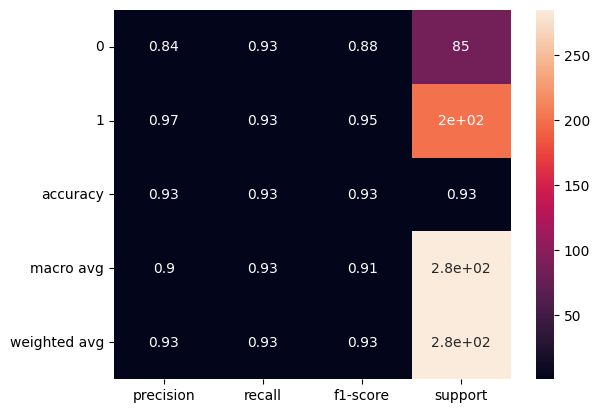

In [ ]:
y_pred = model_XGB.predict(X)
report = classification_report(y, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True)



**XGBoost----Firefly Algorithm**

In [ ]:
# Run the firefly algorithm to find the optimal solution
best_solution_XGB, best_fitness_XGB = firefly_algorithm(population1, fitness_function_XGboost, intervals, 
                                                max_iterations, alpha=0.2, beta=1, gamma=1)


In [ ]:
# Print the results
print("Best solution: ", best_solution_XGB)
print("Best fitness: ", best_fitness_XGB)

Best solution:  [59.39506331878569, 8.840962900358964, 0.8380946316922598, 3.633810210479861, 0.9243538110030145, 0.5344376005256464, 1.0169454314541428]
Best fitness:  0.7566964285714286


In [ ]:
best_solution_XGB[0] = round(best_solution_XGB[0])
best_solution_XGB[1] = round(best_solution_XGB[1])

In [ ]:
best_solution_XGB

[59,
 9,
 0.8380946316922598,
 3.633810210479861,
 0.9243538110030145,
 0.5344376005256464,
 1.0169454314541428]

In [ ]:
# create an XGBoost classifier object and set its parameters to the global_best_position
model_XGB_F = xgb.XGBClassifier(n_estimators= best_solution_XGB[0],
                              max_depth=best_solution_XGB[1],
                              learning_rate=best_solution_XGB[2],
                              min_child_weight=best_solution_XGB[3],
                              subsample =best_solution_XGB[4],
                              colsample_bytree=best_solution_XGB[5],
                              gamma =best_solution_XGB[6])

# fit the model to your training data and evaluate it on your test data
model_XGB_F.fit(X_train_os, Y_train_os)
accuracy = model_XGB_F.score(X_train_os, Y_train_os)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.44%


In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [ ]:
# predict labels for test set
y_test = model_XGB_F.predict(X)

# calculate evaluation metrics
accuracy = metrics.accuracy_score(y, y_test)
precision = precision_score(y, y_test, average='weighted')
recall = recall_score(y, y_test, average='weighted')
f1_score = metrics.f1_score(y, y_test,average='weighted')

# print evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)


Accuracy:  0.7929824561403509
Precision:  0.8021529518240045
Recall:  0.7929824561403509
F1 Score:  0.7963460612217388


In [ ]:
from sklearn.metrics import classification_report

y_pred = model_XGB_F.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.67        85
           1       0.87      0.82      0.85       200

    accuracy                           0.79       285
   macro avg       0.75      0.77      0.76       285
weighted avg       0.80      0.79      0.80       285



<Axes: >

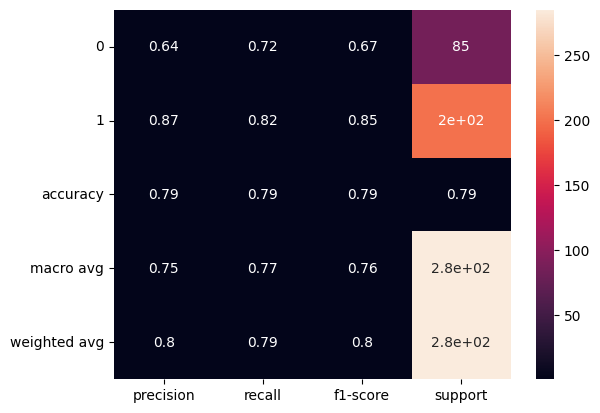

In [ ]:
y_pred = model_XGB_F.predict(X)
report = classification_report(y, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).transpose(), annot=True)

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
len(data)

285

In [ ]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,0,4,0,0,1,1,2,0
1,1,2,0,4,0,0,1,0,1,0
2,1,4,1,3,0,0,1,1,0,0
3,1,2,0,0,0,0,1,1,3,0
4,1,4,1,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
280,0,1,0,6,0,0,1,0,0,0
281,0,1,0,4,0,0,2,0,0,1
282,0,4,1,4,0,0,0,1,0,0
283,0,2,1,6,1,0,2,0,1,0


In [ ]:
X = data.drop('class', axis=1)
X = StandardScaler().fit_transform(X)

In [ ]:
len(X)

285

In [ ]:
km = KMeans(n_clusters=2)
km_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


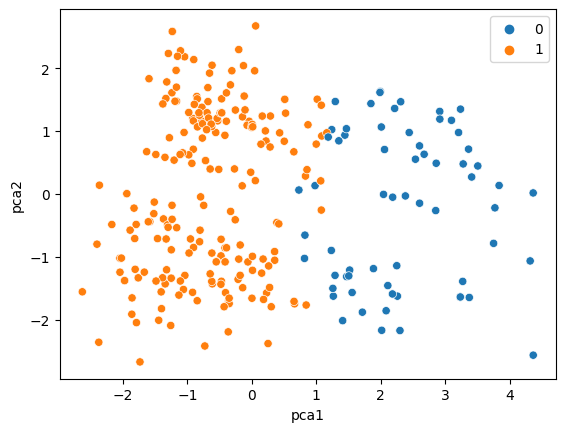

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=km_pred, data=results)
plt.show()